the research objective of this project is to understand the factors that influence whether a person will accept a coupon when they are the driver in different driving scenarios. The dataset contains information about various aspects of these driving scenarios, such as the destination, time of day, weather conditions, passengers in the car, 


The project's primary goal is to build a model or set of rules that can predict whether someone will accept a coupon based on the provided features. This classification task can help businesses tailor their marketing strategies to increase coupon acceptance rates in different driving scenarios.

Import Libraries

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

Loading the Dataset

In [2]:
#Loading the Dataset
in_vehicle_coupon = pd.read_csv("in-vehicle-coupon-recommendation.csv")

in_vehicle_coupon

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


Initial Data Exploration

In [3]:
print(f"Dataset Shape: {in_vehicle_coupon.shape}")
print(f"First 5 Rows:\n{in_vehicle_coupon.head()}")
print(f"Last 5 Rows:\n{in_vehicle_coupon.tail()}")
print(f"Missing Values:\n{in_vehicle_coupon.isnull().sum()}")
in_vehicle_coupon.describe(include='all')


Dataset Shape: (12684, 26)
First 5 Rows:
       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


Exploratory Data Analysis (EDA)

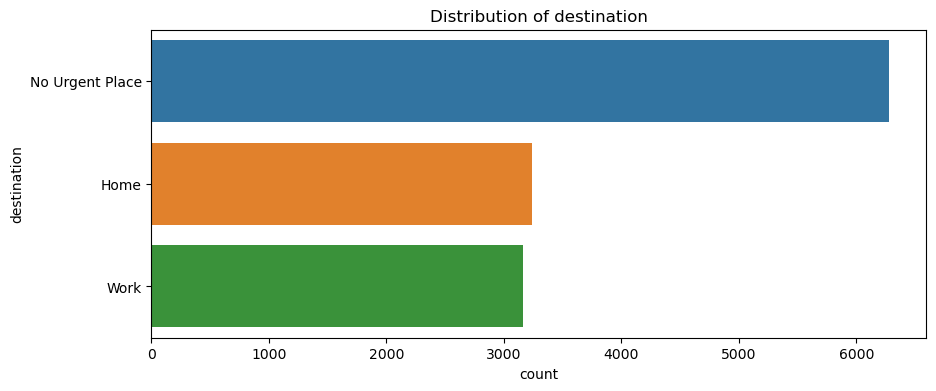

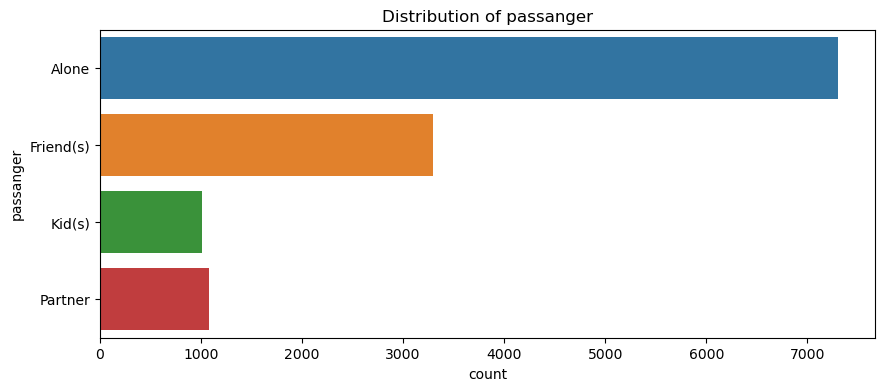

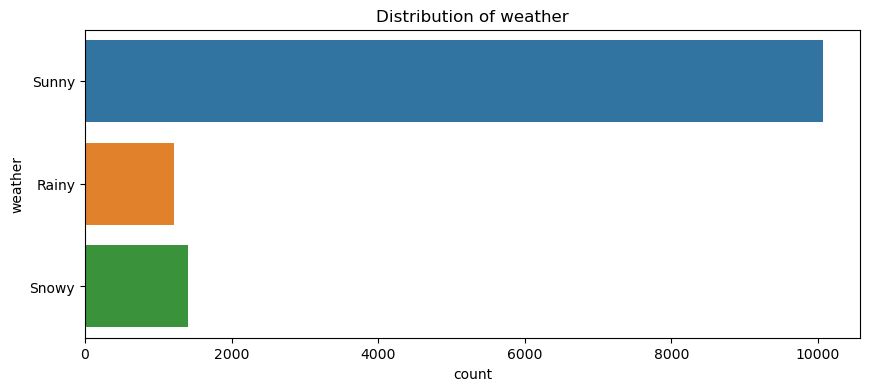

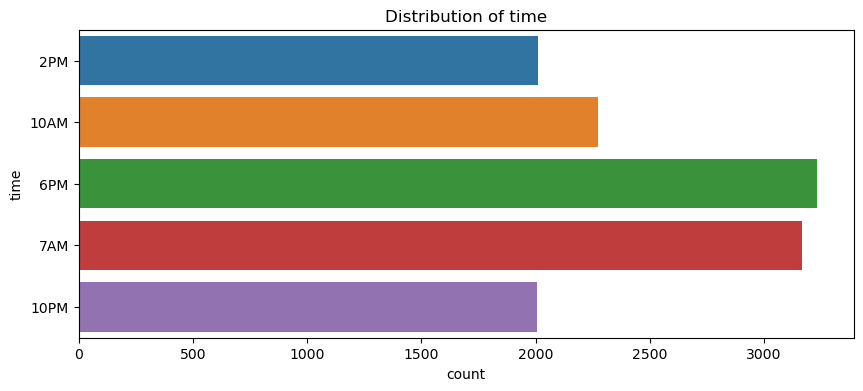

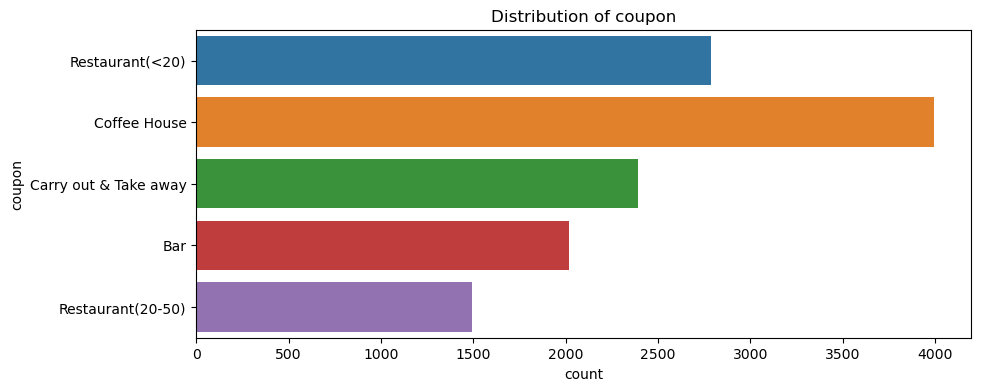

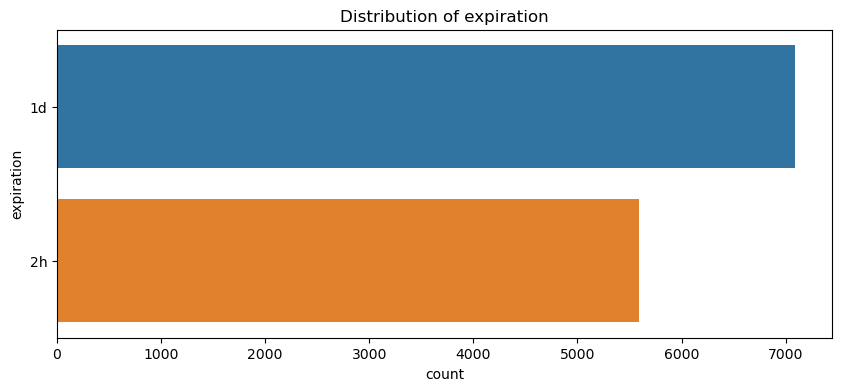

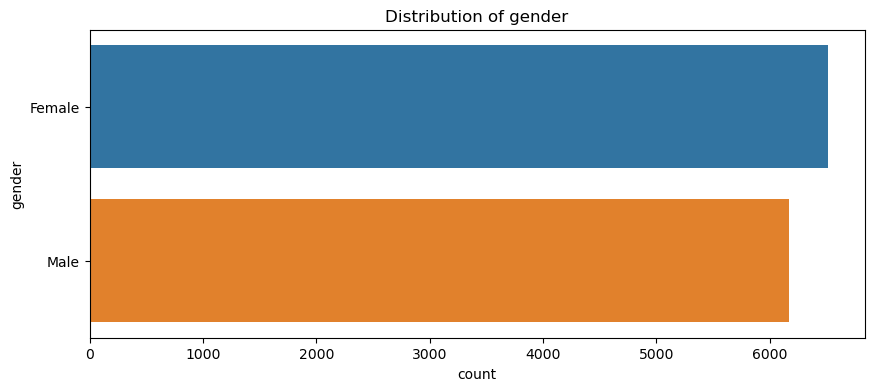

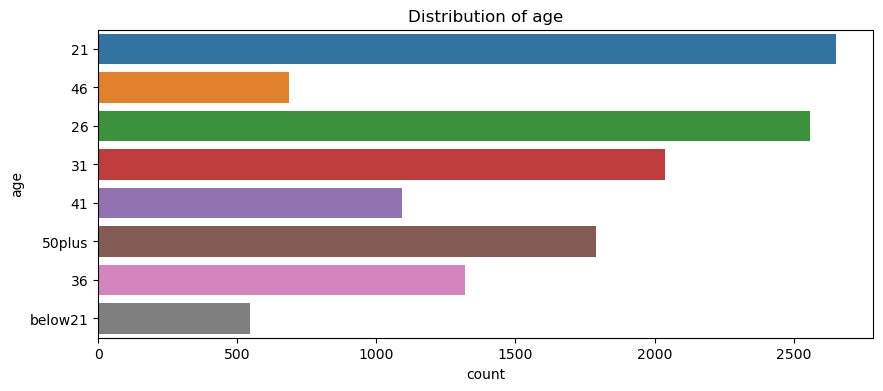

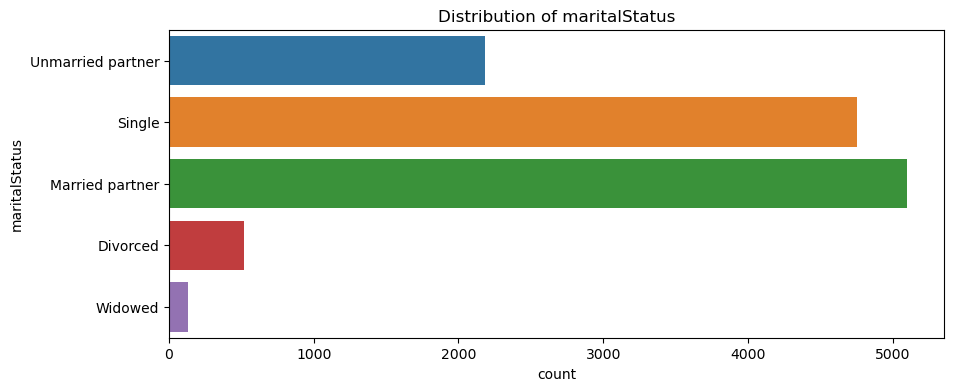

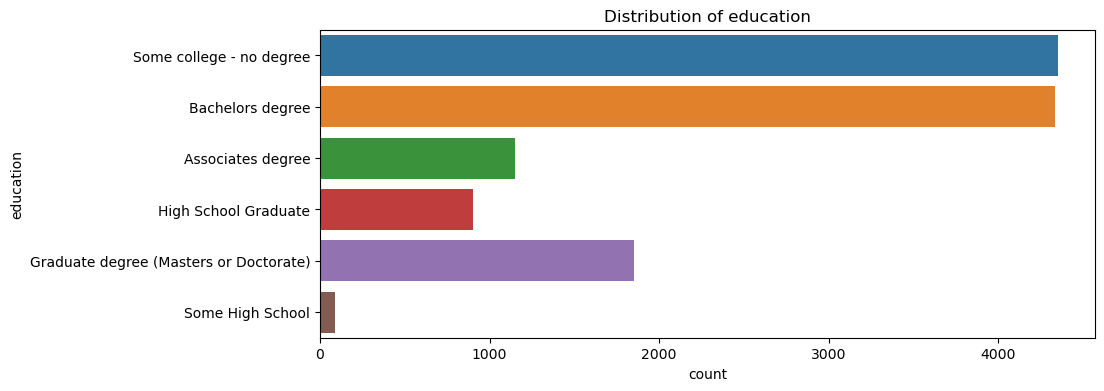

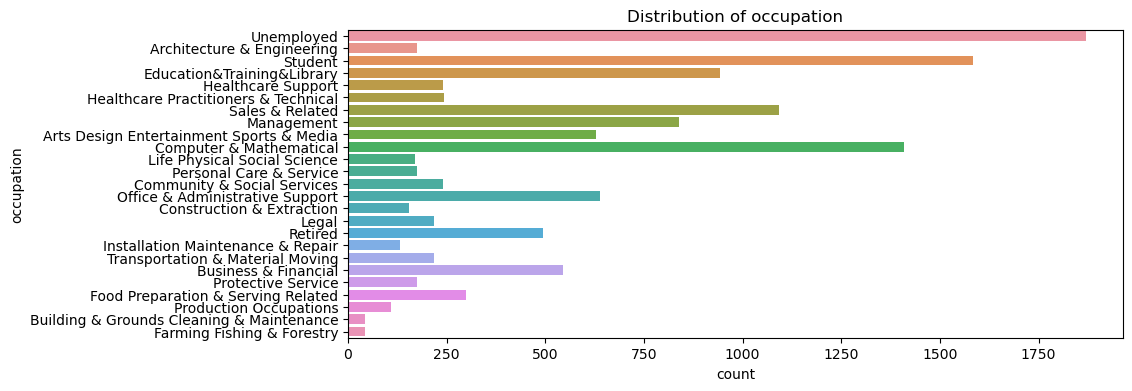

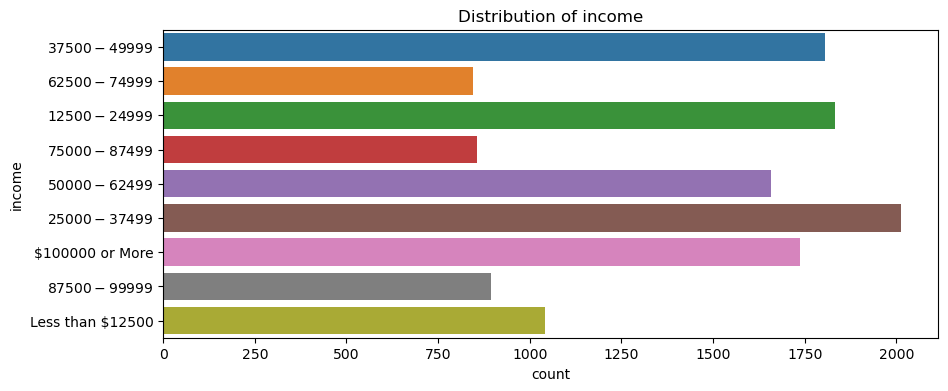

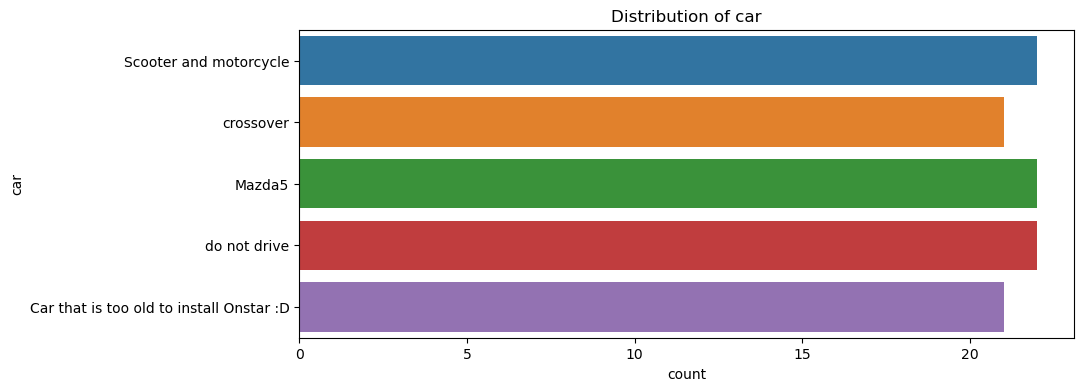

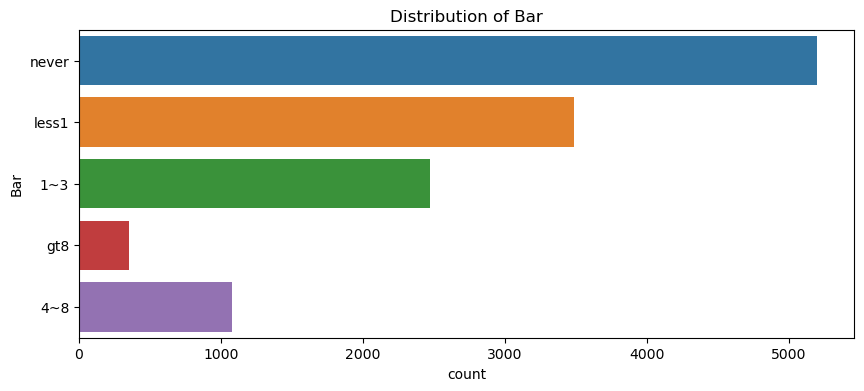

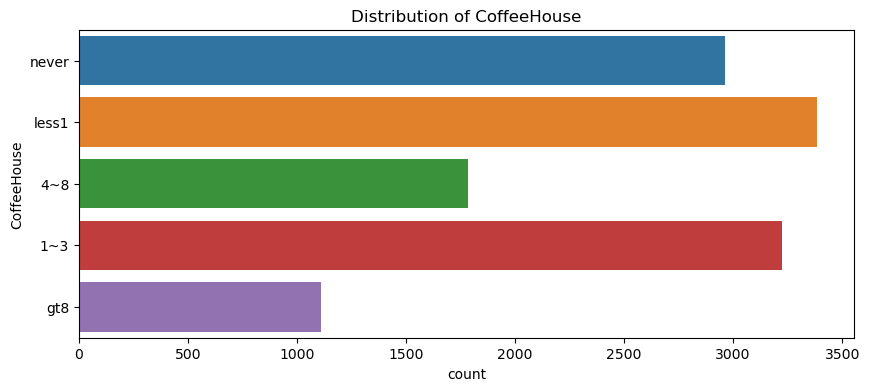

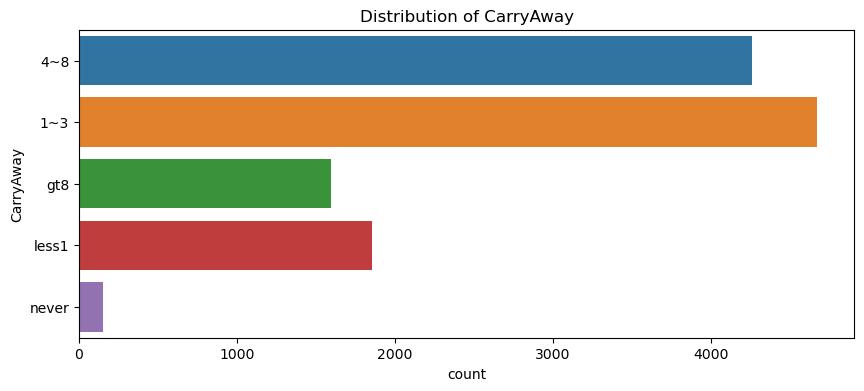

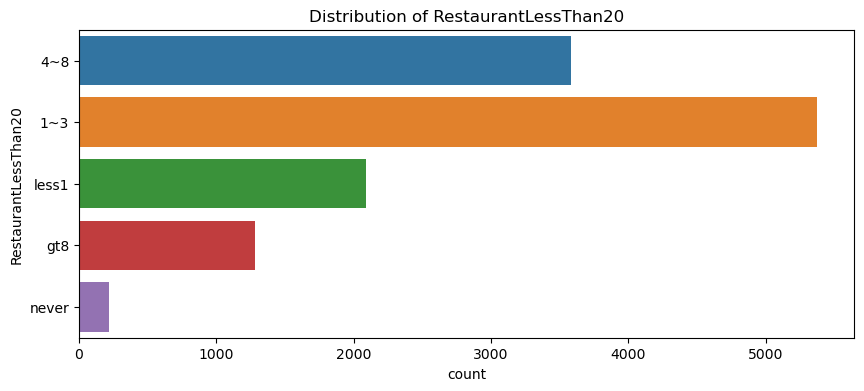

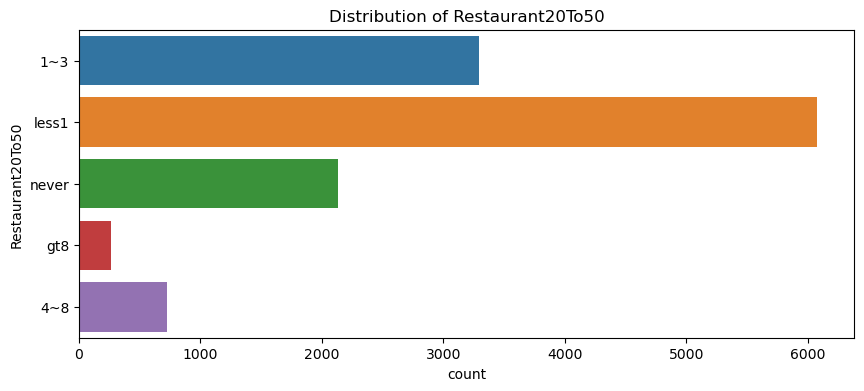

In [4]:
categorical_vars = in_vehicle_coupon.select_dtypes(include=['object']).columns
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=var, data=in_vehicle_coupon)
    plt.title(f'Distribution of {var}')
    plt.show()



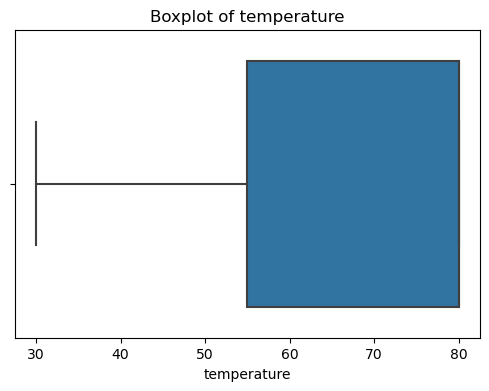

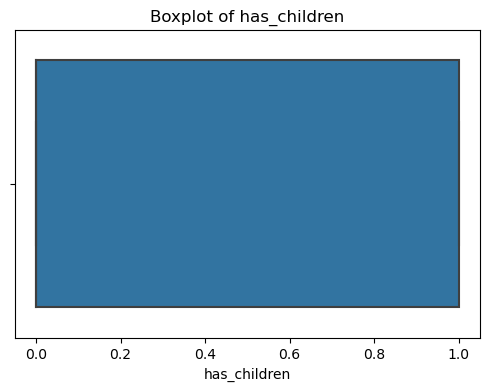

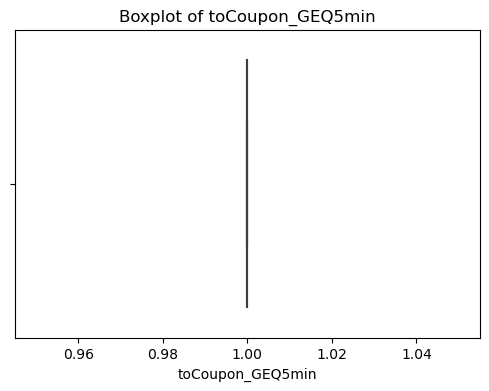

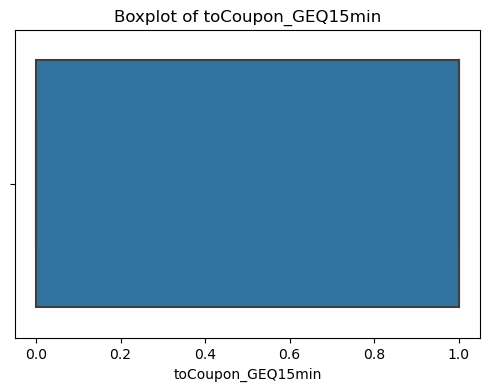

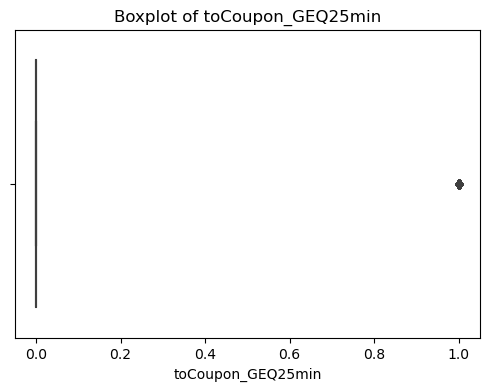

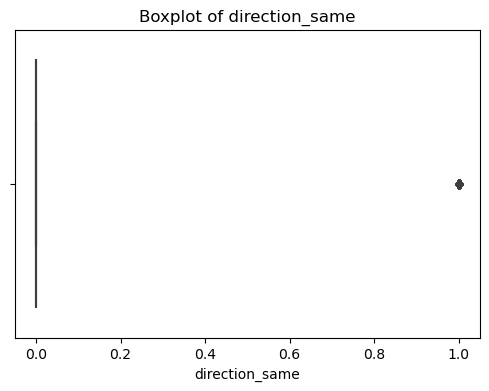

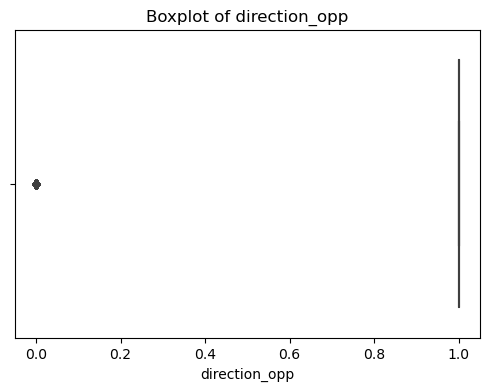

In [5]:

numerical_cols = in_vehicle_coupon.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Y')
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=in_vehicle_coupon[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Data Cleaning and Preprocessing

In [6]:
# Drop columns with excessive missing values and limited variability
in_vehicle_coupon.drop(["car", "toCoupon_GEQ5min"], axis=1, inplace=True)

# Initializing a SimpleImputer for filling missing values with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')

# Applying the imputer to the dataset and create a new imputed dataset
in_vehicle_coupon_imputed = cat_imputer.fit_transform(in_vehicle_coupon)

# Retrieving column names from the original dataset for the new DataFrame
column_names = in_vehicle_coupon.columns.tolist()

# Converting the imputed data back to a pandas DataFrame with original column names
in_vehicle_coupon = pd.DataFrame(in_vehicle_coupon_imputed, columns=column_names)

# Converting all columns to numeric types, ignoring errors to keep original data if conversion fails
for col in in_vehicle_coupon.columns:
    in_vehicle_coupon[col] = pd.to_numeric(in_vehicle_coupon[col], errors='ignore')

# Printing the count of missing values in each column after imputation
print(f"After Imputation Missing Values:\n{in_vehicle_coupon.isnull().sum()}")



After Imputation Missing Values:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_16372\2725555256.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = in_vehicle_coupon.corr()


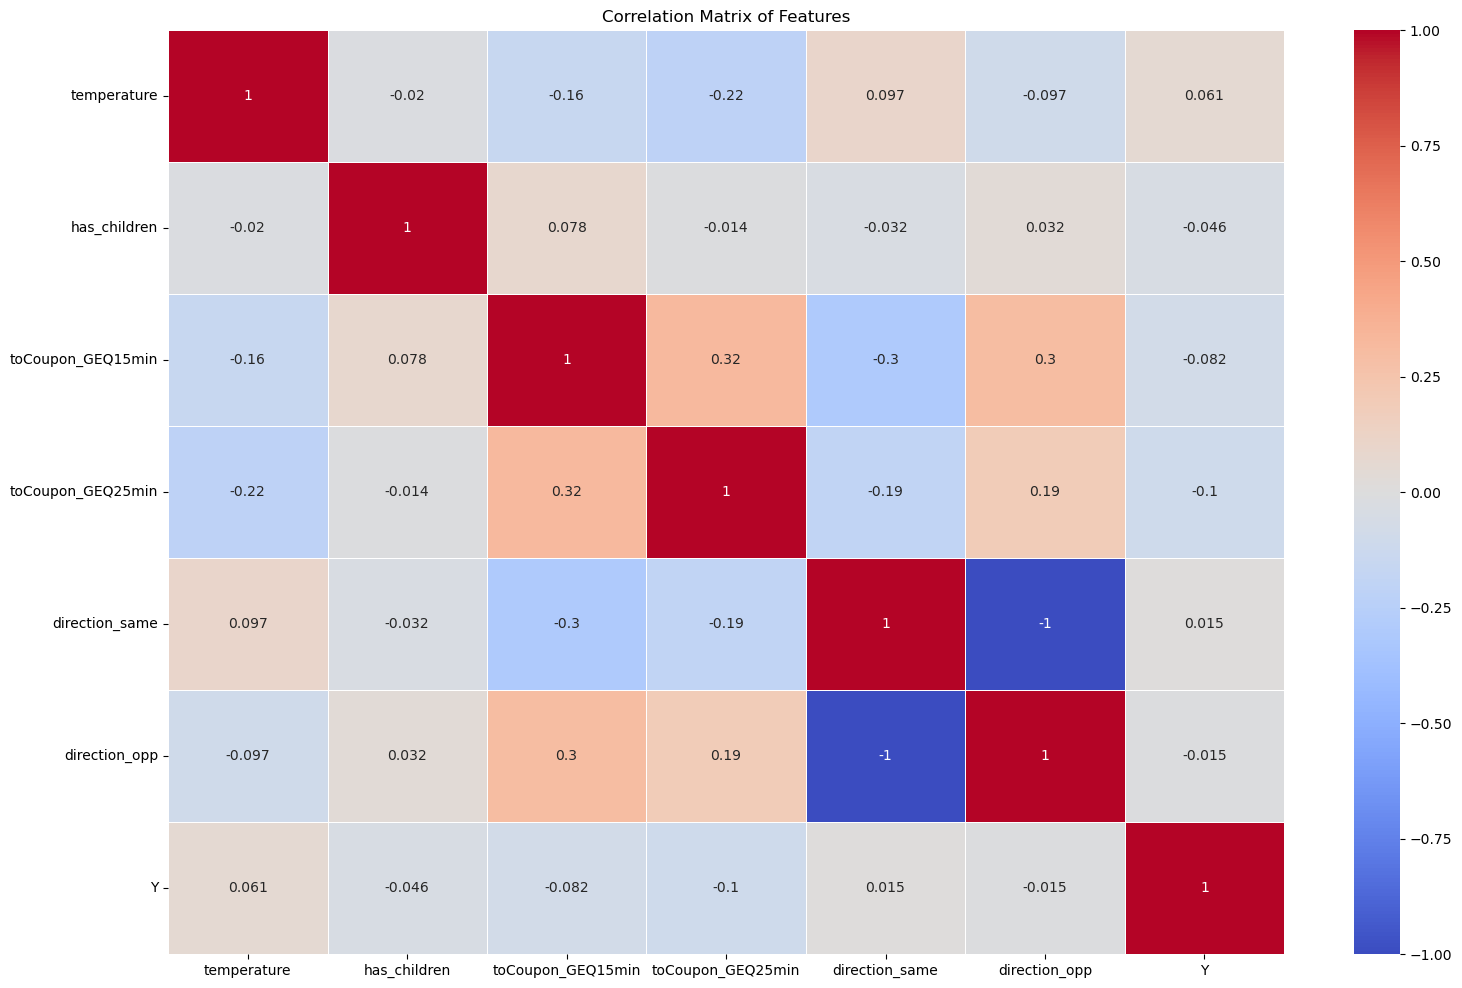

In [7]:

# Feature Correlation Heatmap
# Calculate the correlation matrix
correlation_matrix = in_vehicle_coupon.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

Feature Engineering

In [8]:
age_mapping = {'below21': 20, '21': 21, '26': 26, '31': 31, '36': 36, '41': 41, '46': 46, '50plus': 55}
in_vehicle_coupon['age'] = in_vehicle_coupon['age'].map(age_mapping)
in_vehicle_coupon['gender'] = in_vehicle_coupon['gender'].replace({'Male': 0, 'Female': 1})



In [9]:
remaining_categorical_columns = in_vehicle_coupon.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(drop="first", sparse=False)
onehots = encoder.fit_transform(in_vehicle_coupon[remaining_categorical_columns])
cols = encoder.get_feature_names_out(remaining_categorical_columns)
onehot_df = pd.DataFrame(onehots, columns=cols)
in_vehicle_coupon = pd.concat([in_vehicle_coupon.drop(remaining_categorical_columns, axis=1), onehot_df], axis=1)
in_vehicle_coupon = in_vehicle_coupon.apply(pd.to_numeric)


in_vehicle_coupon

C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,temperature,gender,age,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_No Urgent Place,...,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,21,1,0,0,0,1,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,80,1,21,1,0,0,0,1,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80,1,21,1,1,0,0,1,1,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80,1,21,1,1,0,0,1,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80,1,21,1,1,0,0,1,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,55,0,26,0,0,0,1,0,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12680,55,0,26,0,0,0,0,1,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12681,30,0,26,0,0,0,1,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12682,30,0,26,0,1,1,0,1,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


correlation Analysis after encoding

Feature and Target Separation

In [10]:
X = in_vehicle_coupon.drop('Y', axis=1)
y = in_vehicle_coupon['Y'].astype(int)


In [11]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Shapes of the training and testing sets
X_train_shape = X_train.shape
X_test_shape = X_test.shape

X_train_shape, X_test_shape

((10147, 85), (2537, 85))

Handling Imbalanced Data

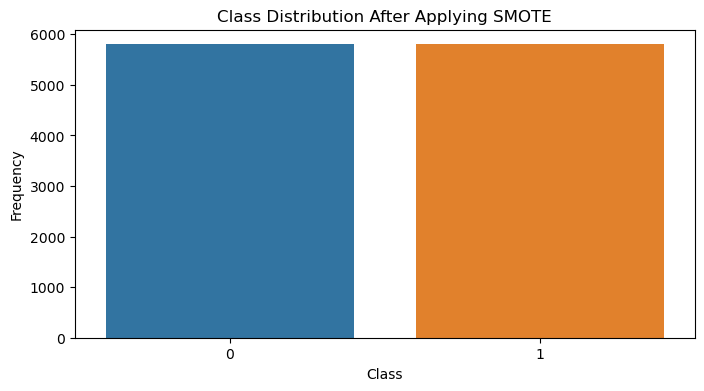

Balanced Target Class Distribution:
0    5801
1    5801
Name: Y, dtype: int64


In [13]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_smote)
plt.title('Class Distribution After Applying SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()
print("Balanced Target Class Distribution:")
print(pd.Series(y_train_smote).value_counts())


Data Standardization

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)


Improving accuracy and overfitting

Hyperparameter Tuning

Random Forest is an ensemble method that can handle overfitting better than a single decision tree.


In [15]:

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Accuracy: 0.7418210484824596


Confusion matrix for Random forest

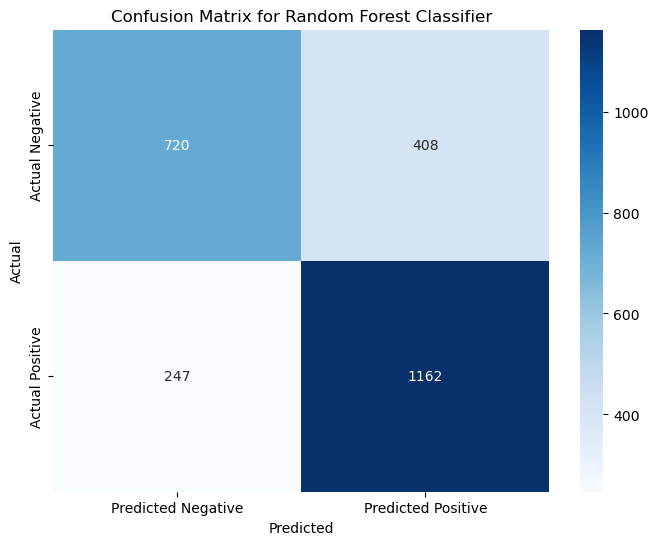

In [16]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [17]:

# Prining the classification report
report = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier Classification Report:\n", report)


Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69      1128
           1       0.74      0.82      0.78      1409

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.74      2537



Precision (0): When it predicts that a driver will not accept the coupon (class 0), it's correct 74% of the time.

Recall (0): However, it only catches 64% of the actual instances when drivers do not accept the coupons. So, it's somewhat cautious, not flagging everyone who might not accept a coupon.

F1-Score (0): This is a combined score that balances precision and recall, and for drivers not accepting coupons, it's at 0.69, which is not bad but suggests there's room for improvement.

Precision (1): When it predicts a driver will accept the coupon (class 1), it's also correct 74% of the time.

Recall (1): It's quite good at finding these drivers—it identifies 82% of all the drivers who would accept the coupon.

F1-Score (1): The combined score for correctly predicting coupon acceptance is 0.78, which is decent. It means that the system is more adept at ensuring coupons go to interested drivers.

Accuracy: Overall, the system makes the right call 74% of the time, regardless of whether it's identifying drivers who will or won't accept a coupon.

Gradient Boosting Classifier
Gradient Boosting is another powerful ensemble technique that combines weak learners to create a strong learner.

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing the Gradient Boosting Classifier with a fixed random state for reproducibility
gbc = GradientBoostingClassifier(random_state=42)

# Training the model on the training dataset
gbc.fit(X_train, y_train)

# Predicting the target values for the test set
y_pred_gbc = gbc.predict(X_test)

# Calculating and displaying the accuracy of the model on the test set
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbc))
# This line outputs the accuracy of the model, providing a straightforward measure of performance on the test data


Gradient Boosting Accuracy: 0.7039810800157666


In [19]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.57      0.63      1128
           1       0.70      0.81      0.75      1409

    accuracy                           0.70      2537
   macro avg       0.70      0.69      0.69      2537
weighted avg       0.70      0.70      0.70      2537



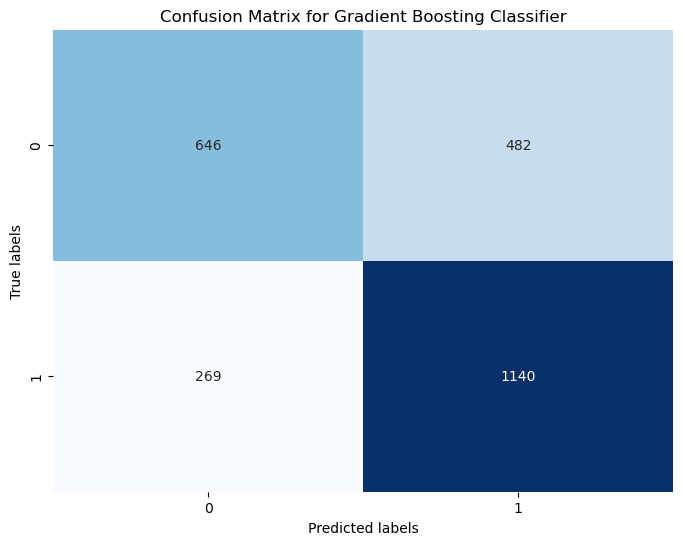

In [20]:
# Plotting the confusion matrix using seaborn
conf_matrix = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

In [21]:
#hyperparameter Tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [200],
    'max_depth': [30],
    'min_samples_split': [5],
    'min_samples_leaf': [1]
}

# Creating a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Instantiating the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Printing the best parameters
print("Best parameters:", grid_search.best_params_)

# Using the best estimator for further predictions
best_rf = grid_search.best_estimator_
print(best_rf)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
RandomForestClassifier(max_depth=30, min_samples_split=5, n_estimators=200,
                       random_state=42)


In [22]:
#using best_rf 
y_pred_rf = best_rf.predict(X_test)
accuracy_after_improvement = accuracy_score(y_test, y_pred_rf)
print("Improved Random Forest Accuracy:", accuracy_after_improvement)


Improved Random Forest Accuracy: 0.7386677177769019


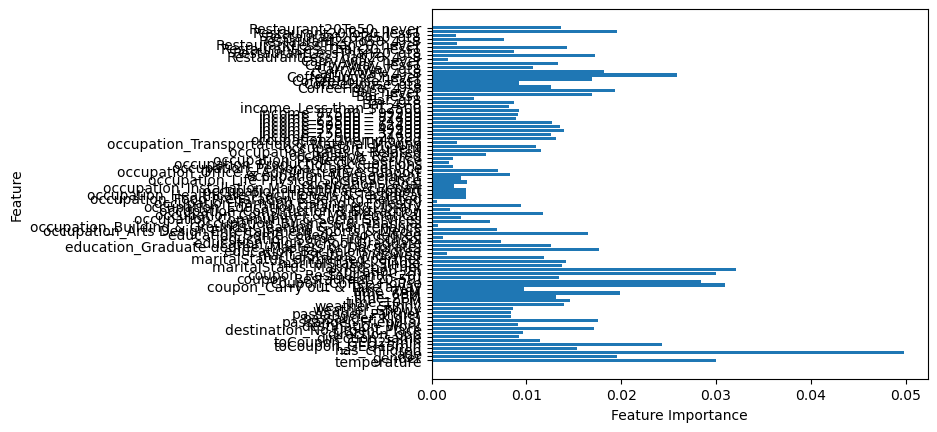

In [23]:
import matplotlib.pyplot as plt

# Train the model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Plot
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()




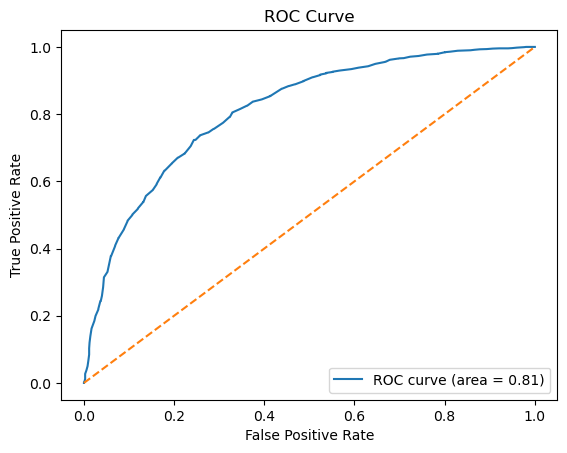

In [24]:

#feature importance
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicting probabilities
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculating the  AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


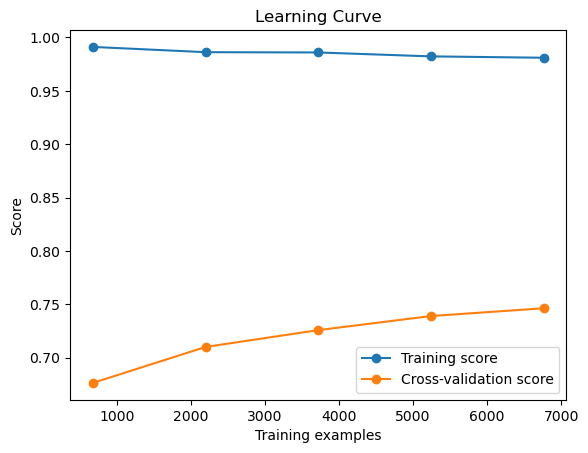

In [25]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_rf, X_train, y_train, n_jobs=-1, cv=3, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()
